### Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
df = sm.datasets.macrodata.load_pandas().data

In [6]:
df.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [8]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [9]:
df.index = index

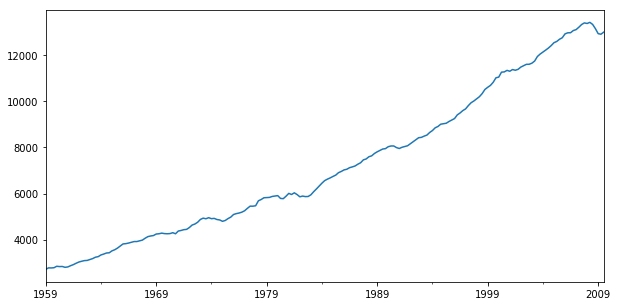

In [18]:
df['realgdp'].plot(figsize = (10,5));

In [15]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

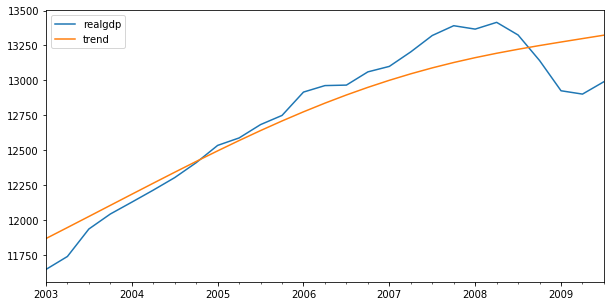

In [19]:
df['trend'] = gdp_trend
df[['realgdp', 'trend']]['2003-3-31':].plot(figsize = (10,5))

### EWMA Models

#### Exponential Weighted Moving Average
* Why? Basic SMA have weaknesses
    * Smaller windows will lead to more noise than signal
    * Extreme historical values can skew our SMA
    * It only describes historical trends
    

In [20]:
airline = pd.read_csv('airline.csv')

In [34]:
airline = pd.read_csv('airline.csv', index_col ='Month')

In [35]:
airline.dropna(inplace = True)

In [36]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [39]:
airline['6mo'] = airline['Passengers'].rolling(6).mean()
airline['10mo'] = airline['Passengers'].rolling(10).mean()

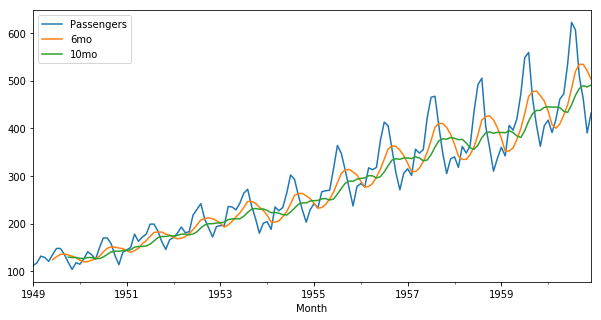

In [40]:
airline.plot(figsize = (10,5))

In [50]:
airline['EWMA_12'] = airline['Passengers'].ewm(span=12).mean()
airline['EWMA_6'] = airline['Passengers'].ewm(span=6).mean()

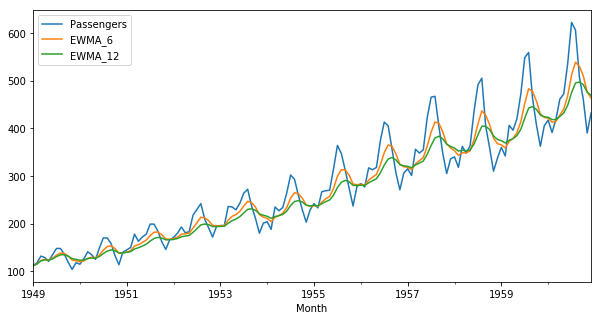

In [51]:
airline[['Passengers', 'EWMA_6', 'EWMA_12']].plot(figsize = (10,5))

In [58]:
airline[['Passengers', 'EWMA_12', '10mo']].tail()

,Passengers,EWMA_12,10mo
Month,,,
1960-08-01,606,494.898620,469.0
1960-09-01,508,496.914217,483.6
1960-10-01,461,491.388952,489.2
1960-11-01,390,475.790652,486.5
1960-12-01,432,469.053629,490.6
